In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins

In [9]:
products = pd.read_csv('products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [10]:
orders = pd.read_csv('orders.csv')
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


In [13]:
order_products = pd.read_csv('order_products.csv')
order_products

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
...,...,...,...
33819101,3421063,14233,3
33819102,3421063,35548,4
33819103,3421070,35951,1
33819104,3421070,16953,2


In [ ]:
departments = pd.read_csv('departments.csv')
departments
#departments.info()

In [7]:
aisles = pd.read_csv('aisles.csv')
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [8]:
join_table=pd.merge(order_products,orders,on=['order_id'])

In [9]:
join_table1=pd.merge(join_table,products,on=['product_id'])

In [10]:
join_table2=pd.merge(join_table1,aisles,on=['aisle_id'])

In [11]:
join_table3=pd.merge(join_table2,departments,on=['department_id'])
join_table3
#add_to_cart_order加入购物车的顺序 
#order_number一个user名下的单号的顺序
#order——dow day of week 一周中第几天下的单

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,153404,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,23750,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,58707,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,166654,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2909991,18001,5,80613,10,0,11,2.0,Dried Porcini Mushroom,6,2,other,other
33819102,3016581,46404,1,132609,8,5,14,2.0,Cotes De Provence Rose,6,2,other,other
33819103,3326955,46404,1,132609,7,3,15,2.0,Cotes De Provence Rose,6,2,other,other
33819104,3340423,46404,3,103807,12,6,14,4.0,Cotes De Provence Rose,6,2,other,other


In [14]:
join_table_to_csv = pd.read_csv('join_table_to_csv.csv')

In [15]:
new_data=join_table_to_csv[['user_id','aisle','order_id']]
new_data

,user_id,aisle,order_id
0,202279,eggs,2
1,153404,eggs,26
2,23750,eggs,120
3,58707,eggs,327
4,166654,eggs,390
...,...,...,...
33819101,80613,other,2909991
33819102,132609,other,3016581
33819103,132609,other,3326955
33819104,103807,other,3340423


In [16]:
pivot = pd.pivot_table(new_data,index='user_id',columns='aisle',values='order_id',aggfunc=np.size)
pivot

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
206206,NaN,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
206207,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,2.0,1.0,NaN,NaN,11.0,NaN,15.0


In [21]:
pivot1 = pivot.fillna(0)

In [15]:
#purchase = pd.merge(pivot1,orders,on=['user_id'])

In [22]:
pivot1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0


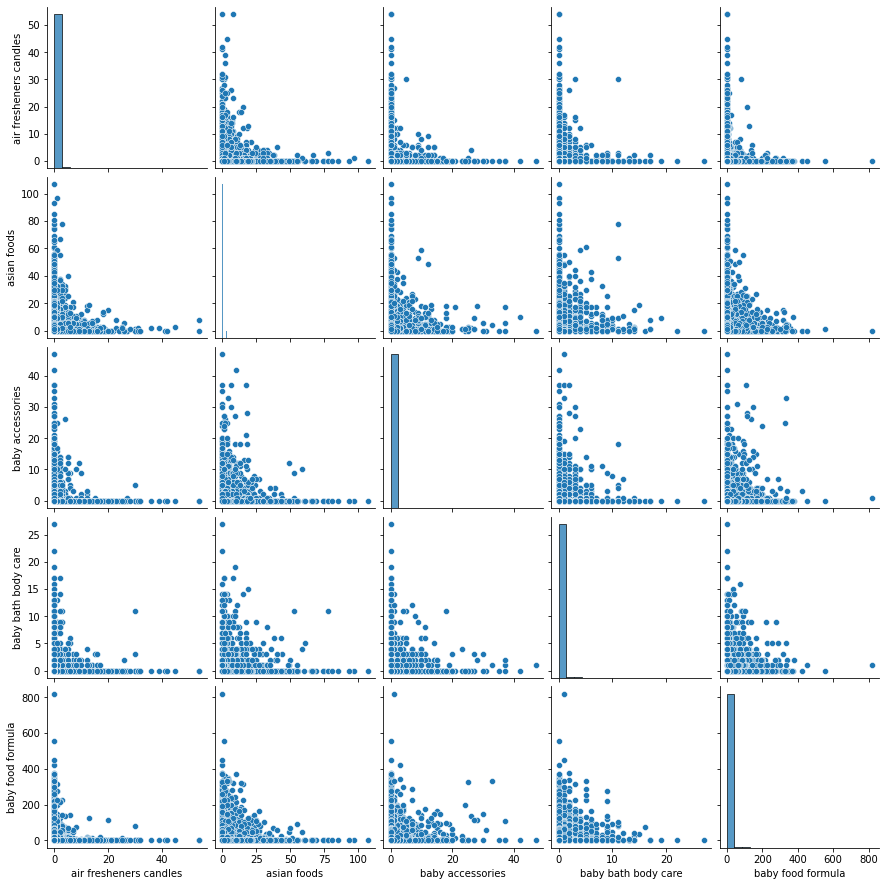

In [26]:
sns.pairplot(pivot1.iloc[:,range(5)])

In [17]:
#binary
binary_data = pivot1.astype(bool).astype(int)
binary_data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
206206,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
206207,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,1,0,0,1,0,1


In [18]:
from sklearn import preprocessing
X=binary_data.values[:,1:]
x_scaled = preprocessing.scale(X)
x_scaled

array([[-0.62324566, -0.13254177, -0.15855659, ..., -0.99619074,
        -0.18060937,  0.78838308],
       [ 1.60450376, -0.13254177, -0.15855659, ...,  1.00382383,
        -0.18060937,  0.78838308],
       [-0.62324566, -0.13254177, -0.15855659, ...,  1.00382383,
        -0.18060937, -1.26841891],
       ...,
       [-0.62324566, -0.13254177, -0.15855659, ...,  1.00382383,
        -0.18060937,  0.78838308],
       [ 1.60450376, -0.13254177, -0.15855659, ..., -0.99619074,
        -0.18060937,  0.78838308],
       [ 1.60450376, -0.13254177, -0.15855659, ..., -0.99619074,
        -0.18060937,  0.78838308]])

In [19]:
norm_binary_data = pd.DataFrame(x_scaled)
norm_binary_data

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383
1,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,2.529826,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,0.788383
2,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,-1.268419
3,-0.623246,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,1.572390,-0.250591,-0.314543,-0.338652,1.003824,-0.180609,-1.268419
4,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-0.623246,7.544791,-0.158557,-0.384862,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,-0.837476,-0.603433,-0.395284,-0.635975,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383
206205,1.604504,-0.132542,-0.158557,-0.384862,-0.272173,1.147088,3.507801,-0.147983,-0.204506,-0.308878,...,1.194064,-0.603433,-0.395284,-0.635975,-0.250591,3.179215,-0.338652,1.003824,-0.180609,-1.268419
206206,-0.623246,-0.132542,-0.158557,2.598335,-0.272173,-0.871773,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,1.657184,-0.395284,1.572390,3.990561,-0.314543,-0.338652,1.003824,-0.180609,0.788383
206207,1.604504,-0.132542,-0.158557,2.598335,-0.272173,1.147088,-0.285079,-0.147983,-0.204506,-0.308878,...,1.194064,-0.603433,-0.395284,1.572390,-0.250591,-0.314543,-0.338652,-0.996191,-0.180609,0.788383


In [20]:
## to do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(norm_binary_data)
principalDf = pd.DataFrame(data = principalComponents 
 , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [21]:
principalDf.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
206204,-2.036383,-1.826364,-0.827340,0.056016,0.064411
206205,5.014457,1.968338,-0.417436,0.154985,0.225077
206206,4.421203,-2.941525,0.103344,-2.265580,-0.764451
206207,8.341809,-2.558728,0.321858,-0.749565,-0.126985
206208,3.384890,0.027599,0.003542,1.239264,-0.199720


In [22]:
sample_data=principalDf.sample(frac=0.01, replace=False, random_state=None)
sample_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
167411,-1.717823,1.099909,-1.841452,-2.512418,2.116168
116128,7.714641,1.562704,-2.224903,3.502554,1.322249
107335,-3.507934,-0.658055,-0.297352,0.986343,-0.195868
176618,-1.625071,-0.904699,-0.871867,1.006713,0.564549
190745,2.824082,-0.141117,-0.914458,0.393836,-0.823512
...,...,...,...,...,...
180238,9.745128,1.035202,-1.730993,1.157269,0.005845
30893,2.121680,2.258434,-0.364296,-0.169072,-0.402765
202047,-2.736349,0.308913,0.046923,-1.866633,-2.059345
31783,-2.584268,0.066737,0.060644,-0.004847,-1.251151


In [23]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(sample_data)
    wcss.append(kmeans.inertia_)
wcss

[56012.42557102661,
 35791.56865980815,
 29971.134473802817,
 26290.660619142764,
 23123.11389808548,
 20841.86034605446,
 19482.510057941698,
 18256.372287210925,
 17204.1979843683]

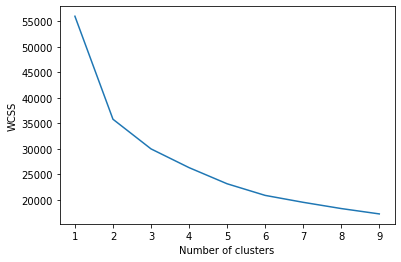

In [24]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from sklearn.cluster import KMeans
kmeans_new = KMeans(2)
kmeans.fit(principalDf)
#cluster_new = pivot1.copy()
principalDf['cluster_pred'] = kmeans_new.fit_predict(principalDf)
principalDf
#principalDf['cluster_pred']

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,cluster_pred
0,-3.977731,0.698630,-0.887861,-0.927790,0.807396,0
1,1.597263,0.614310,-2.603286,-1.737457,2.736684,1
2,-2.949097,-0.323598,-0.738320,-0.673031,0.307841,0
3,-3.974306,2.739322,3.994307,-0.678250,2.961283,0
4,-2.689323,-1.704256,0.547036,0.904147,-0.565450,0
...,...,...,...,...,...,...
206204,-2.036383,-1.826364,-0.827340,0.056016,0.064411,0
206205,5.014457,1.968338,-0.417436,0.154985,0.225077,1
206206,4.421203,-2.941525,0.103344,-2.265580,-0.764451,1
206207,8.341809,-2.558728,0.321858,-0.749565,-0.126985,1


In [26]:
pivot1.insert(pivot1.shape[1],'cluster', principalDf['cluster_pred'])
pivot1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0,1.0


In [27]:
pivot1_to_csv = pivot1.to_csv('pivot1_to_csv.csv')

In [30]:
cluster0=pivot1[pivot1.cluster == 0]
cluster0

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
11,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,2.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206202,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,22.0,0.0,0.0,0.0,0.0,27.0,0.0,4.0,0.0
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [41]:
cluster0_to_csv = cluster0.to_csv('cluster0_to_csv.csv')

In [43]:
cluster1_to_csv = cluster1.to_csv('cluster1_to_csv.csv')

In [42]:
cluster1=pivot1[pivot1.cluster == 1]
cluster1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206196,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,1.0
206197,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206201,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0


In [31]:
cluster0.describe()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
count,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,...,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.000000,77626.0
mean,0.102736,0.841535,0.042086,0.044109,1.962951,0.179115,1.654574,0.124610,0.031665,0.233788,...,1.245420,0.644616,0.980522,0.181795,0.162111,0.229433,4.274302,0.150761,7.363216,0.0
std,0.744982,2.416134,0.560946,0.383676,11.472530,1.153872,3.874770,0.634912,0.277559,2.750117,...,5.106043,3.292635,2.919750,1.366168,0.782333,1.132963,11.123612,1.692110,17.777081,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,7.000000,0.0
max,36.000000,97.000000,47.000000,27.000000,555.000000,49.000000,160.000000,69.000000,21.000000,279.000000,...,376.000000,139.000000,103.000000,65.000000,71.000000,58.000000,377.000000,126.000000,630.000000,0.0


In [40]:
mean = cluster0.mean()
mean.sort_values()

aisle
cluster                        0.000000
frozen juice                   0.022364
beauty                         0.031665
baby accessories               0.042086
baby bath body care            0.044109
                                ...    
packaged cheese                5.013694
yogurt                         7.363216
packaged vegetables fruits     9.017211
fresh vegetables              17.308273
fresh fruits                  18.454835
Length: 135, dtype: float64

In [45]:
mean1 = cluster1.mean()
mean1.sort_values()

aisle
frozen juice                   0.026528
beauty                         0.031085
baby accessories               0.040433
baby bath body care            0.042658
eye ear care                   0.045722
                                ...    
packaged cheese                4.917205
yogurt                         7.279425
packaged vegetables fruits     8.895732
fresh vegetables              17.304576
fresh fruits                  18.354606
Length: 135, dtype: float64

In [36]:
sum = cluster0.sum()
sum.sort_values()

aisle
cluster                             0.0
frozen juice                     1736.0
beauty                           2458.0
baby accessories                 3267.0
baby bath body care              3424.0
                                ...    
packaged cheese                389193.0
yogurt                         571577.0
packaged vegetables fruits     699970.0
fresh vegetables              1343572.0
fresh fruits                  1432575.0
Length: 135, dtype: float64

In [46]:
sum1 = cluster1.sum()
sum1.sort_values()

aisle
frozen juice                     3411.0
beauty                           3997.0
baby accessories                 5199.0
baby bath body care              5485.0
eye ear care                     5879.0
                                ...    
packaged cheese                632264.0
yogurt                         936003.0
packaged vegetables fruits    1143831.0
fresh vegetables              2225057.0
fresh fruits                  2360072.0
Length: 135, dtype: float64

In [25]:

pivot2 = pd.read_csv('pivot1_to_csv.csv')


In [26]:
join_table4=pd.merge(join_table_to_csv,pivot2,on=['user_id'])
join_table4

,Unnamed: 0,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
0,0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
1,622,104690,33120,2,202279,8,6,10,30.0,Organic Egg Whites,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
2,802,132412,33120,1,202279,6,5,9,30.0,Organic Egg Whites,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
3,15928,2808715,33120,1,202279,5,5,13,9.0,Organic Egg Whites,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
4,16423,2894949,33120,5,202279,1,5,9,NaN,Organic Egg Whites,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,33657664,2942910,36885,1,95228,7,6,11,10.0,Rose,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33819102,33665634,77392,47713,1,95228,2,6,17,6.0,Sparkling Rose,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33819103,33665640,679020,47713,1,95228,4,5,8,9.0,Sparkling Rose,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33819104,33665649,1264096,47713,1,95228,3,3,19,11.0,Sparkling Rose,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
cluster_table_to_csv = join_table4.to_csv('cluster_table_to_csv.csv')

KeyboardInterrupt: 

In [ ]:
cluster1_table=join_table4[join_table4.cluster == 1]
cluster1_table

In [1]:
cluster1_table.describe()

NameError: name 'cluster1_table' is not defined

In [92]:
## to do PCA again
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(principalDf)
principalDfagain = pd.DataFrame(data = principalComponents 
 , columns = ['principal component 1', 'principal component 2'])
principalDfagain

,principal component 1,principal component 2
0,-3.995920,0.697345
1,1.652829,0.612455
2,-2.972619,-0.324043
3,-3.992404,2.737779
4,-2.713765,-1.704549
...,...,...
206204,-2.064538,-1.826055
206205,5.051207,1.969277
206206,4.462781,-2.941047
206207,8.361750,-2.554926


In [94]:
finalDf = pd.concat([principalDfagain, principalDf[['cluster_pred']]], axis =1)
finalDf

,principal component 1,principal component 2,cluster_pred
0,-3.995920,0.697345,1
1,1.652829,0.612455,0
2,-2.972619,-0.324043,1
3,-3.992404,2.737779,1
4,-2.713765,-1.704549,1
...,...,...,...
206204,-2.064538,-1.826055,1
206205,5.051207,1.969277,0
206206,4.462781,-2.941047,0
206207,8.361750,-2.554926,0


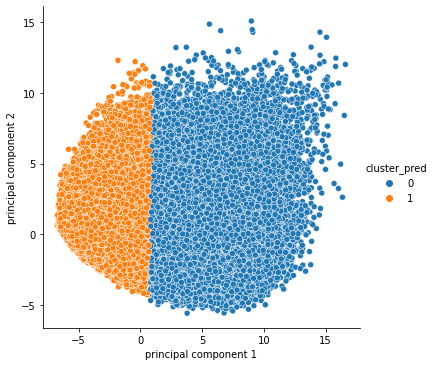

In [96]:
sns.relplot(x="principal component 1", y="principal component 2", hue="cluster_pred", data=finalDf)

In [23]:
#log
log_data = np.log(pivot1)
log_data

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,0.000000,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.693147
2,-inf,1.098612,-inf,-inf,-inf,-inf,0.693147,-inf,-inf,-inf,...,1.098612,0.000000,0.0,-inf,-inf,-inf,-inf,0.693147,-inf,3.737670
3,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,1.386294,0.000000,-inf,-inf,-inf,-inf,-inf,0.693147,-inf,-inf
4,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,0.000000,-inf,-inf,-inf,0.000000,-inf,-inf
5,0.0,1.386294,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,2.197225
206206,-inf,1.386294,-inf,-inf,-inf,-inf,1.386294,0.0,-inf,-inf,...,0.000000,-inf,-inf,-inf,-inf,0.0,-inf,0.000000,-inf,-inf
206207,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf,-inf,-inf,...,1.098612,1.386294,-inf,0.693147,0.0,-inf,-inf,2.397895,-inf,2.708050


In [24]:
from sklearn import preprocessing
X_log=log_data.values[:,1:]
x_scaled_log = preprocessing.scale(X_log)
x_scaled_log

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
norm_log_data = pd.DataFrame(x_scaled_log)
norm_log_data

In [ ]:
from sklearn.cluster import KMeans
wcss_log = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(norm_log_data)
    wcss_log.append(kmeans.inertia_)
wcss_log

In [ ]:
plt.plot(range(1,30), wcss_log)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
from sklearn.cluster import KMeans
kmeans_new = KMeans(4)
kmeans.fit(from sklearn.cluster import KMeans
kmeans_new = KMeans(4)
kmeans.fit(norm_log_data)


log['cluster_pred'] = kmeans_new.fit_predict(norm_log_data)
log

size                               \
                      order_id                                
aisle   air fresheners candles asian foods baby accessories   
user_id                                                       
1                            0           0                0   
2                            0           1                0   
3                            0           0                0   
4                            0           0                0   
5                            1           1                0   
...                        ...         ...              ...   
206205                       0           0                1   
206206                       0           1                0   
206207                       0           0                0   
206208                       0           1                0   
206209                       0           1                0   

                                                               \
                                                                
aisle   baby bath body care baby food formula bakery desserts   
user_id                                                         
1                         0                 0               0   
2                         0                 0               0   
3                         0                 0               0   
4                         0                 0               0   
5                         0                 0               0   
...                     ...               ...             ...   
206205                    0                 0               0   
206206                    0                 0               0   
206207                    0                 1               0   
206208                    0                 1               0   
206209                    0                 0               0   

                                                                       ...  \
                                                                       ...   
aisle   baking ingredients baking supplies decor beauty beers coolers  ...   
user_id                                                                ...   
1                        0                     0      0             0  ...   
2                        1                     0      0             0  ...   
3                        0                     0      0             0  ...   
4                        0                     0      0             0  ...   
5                        0                     0      0             0  ...   
...                    ...                   ...    ...           ...  ...   
206205                   0                     0      0             0  ...   
206206                   1                     1      0             0  ...   
206207                   0                     0      0             0  ...   
206208                   1                     0      0             0  ...   
206209                   0                     0      0             0  ...   

                                                                             \
                                                                              
aisle   tea tofu meat alternatives tortillas flat bread trail mix snack mix   
user_id                                                                       
1         0                      0                    0                   0   
2         1                      1                    0                   0   
3         1                      0                    0                   0   
4         0                      0                    1                   0   
5         0                      0                    0                   0   
...      ..                    ...                  ...                 ...   
206205    0                      0                    0                   0   
206206    0                      0                    0         

In [26]:
zero_one.columns 

MultiIndex([('size', 'order_id',        'air fresheners candles'),
            ('size', 'order_id',                   'asian foods'),
            ('size', 'order_id',              'baby accessories'),
            ('size', 'order_id',           'baby bath body care'),
            ('size', 'order_id',             'baby food formula'),
            ('size', 'order_id',               'bakery desserts'),
            ('size', 'order_id',            'baking ingredients'),
            ('size', 'order_id',         'baking supplies decor'),
            ('size', 'order_id',                        'beauty'),
            ('size', 'order_id',                 'beers coolers'),
            ...
            ('size', 'order_id',                       'spreads'),
            ('size', 'order_id',                           'tea'),
            ('size', 'order_id',        'tofu meat alternatives'),
            ('size', 'order_id',          'tortillas flat bread'),
            ('size', 'order_id',           'tr

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness','mean compactness', 'mean concavity', 'mean concave points','mean symmetry','mean fractal dimension','radius error', 'texture error','perimeter error',
            'area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst radius','worst texture',
            'worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']

# 分离特征
x = zero_one.loc[:, features].values
# 分离响应变量
y = zero_one.loc[:,['label']].values
# 标准化
x = StandardScaler().fit_transform(x)